# Projeto 2

## Grupo:

- Breno Alves de Sousa, 11345555
- Victor Foscarini Almeida, 10728101
- Victor José de Oliveira, 8911310
- Yago Augusto Bardelotte, 11320724

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [2]:
!pip install -U numpy==1.18

     |████████████████████████████████| 20.1MB 1.1MB/s 
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4


In [3]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import iqr
from scipy.stats import pearsonr, spearmanr

## 1 - Gere dados a partir de uma distribuição de Poisson. Varie a taxas $\lambda$ no intervalo [1,10] e mostre o gráfico da média em função da variância.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Unrecognized location 'uuper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


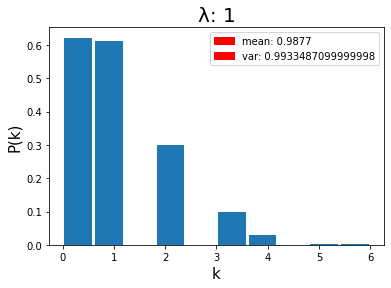

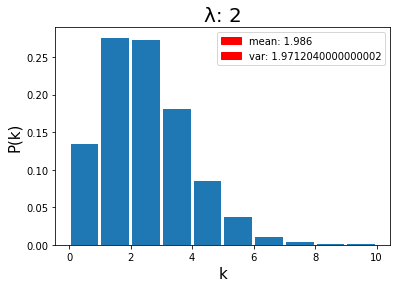

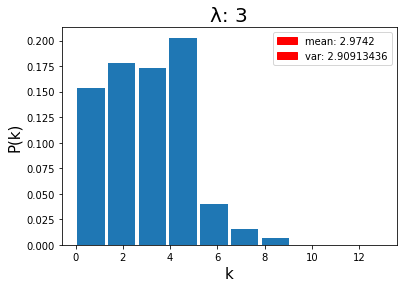

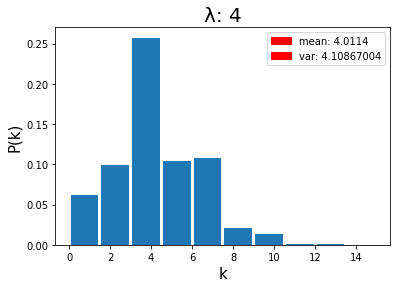

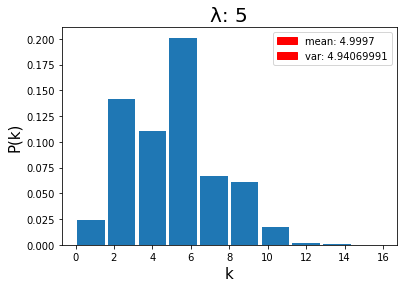

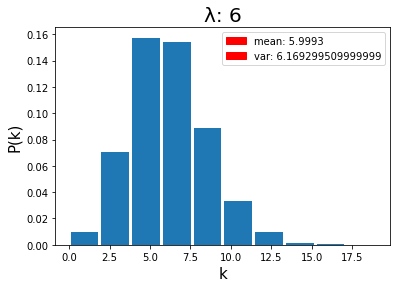

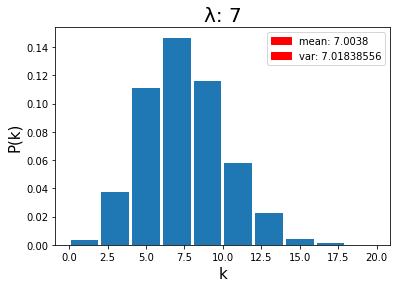

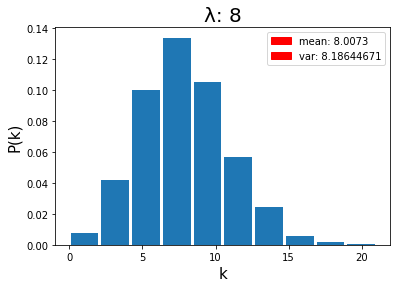

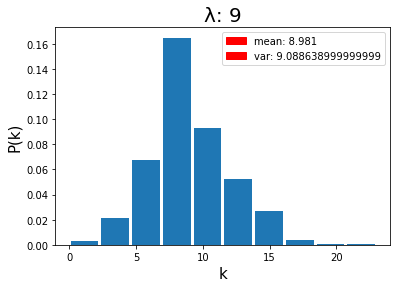

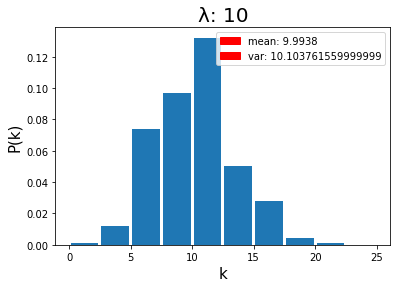

In [4]:
lbd = np.arange(1,11) #taxas
n = 10000 #numero de pontos
means = np.empty(10)
vars = np.empty(10)

for i in range(len(lbd)):

    pts = np.random.poisson(lbd[i],n) # gera pontos numa distribuicao de Poisson

    #plot histogram
    plt.hist(pts,density=True,rwidth=0.9)
    plt.title('λ: '+str(lbd[i]),fontsize=20)
    plt.xlabel('k',fontsize=15)
    plt.ylabel('P(k)',fontsize=15)
    
    means[i] = np.mean(pts)
    vars[i] = np.var(pts)
    
    
    mean = mpatches.Patch(color='red',label='mean: '+str(means[i]))
    var = mpatches.Patch(color='red',label='var: '+str(vars[i]))

    plt.legend(loc='uuper right',handles=[mean,var])
    
    plt.show()


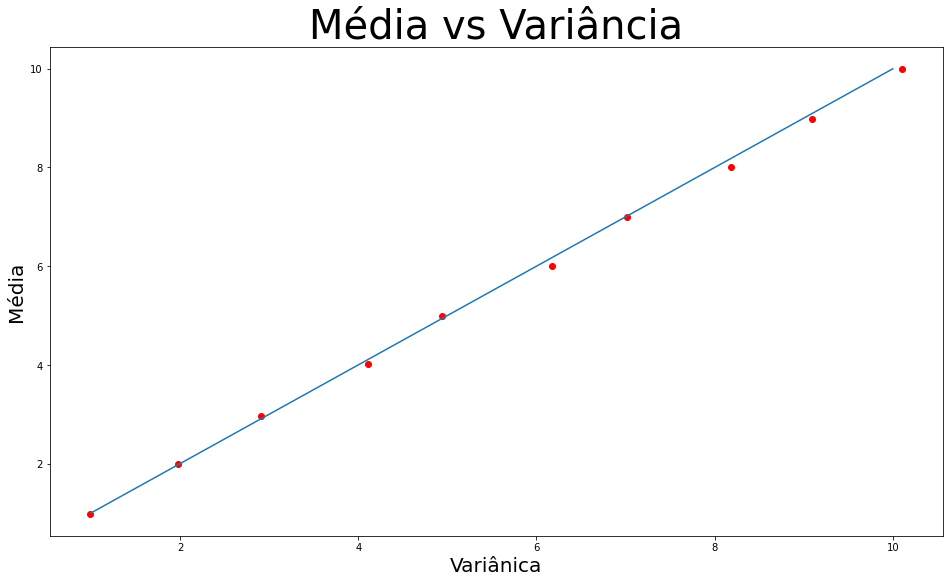

In [5]:
#plot media vs variancia

#pontos
plt.figure(figsize=(16,9))
plt.scatter(vars,means,color='red')

#curva teorica y=x
plt.plot(np.arange(1,11),np.arange(1,11))

#grafico
plt.title('Média vs Variância',fontsize=40)
plt.xlabel('Variânica',fontsize=20)
plt.ylabel('Média',fontsize=20)
plt.show()

###2 - Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [6]:
# IMPORTANDO OS DADOS DA IRIS

data = pd.read_csv('/content/drive/Shared drives/Ciencia de Dados/data/iris.csv', header=0)

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
colunas = data[data.columns[:-1]] # selecionando as colunas numéricas

data_array = np.array(colunas).T # transformando em um array

medias=[]
variancias=[]
IQRs=[]

for i in range(colunas.shape[1]): # para cada coluna do array

  media = np.mean(data_array[i]) # calcula-se a média
  variancia = np.var(data_array[i]) # a variancia
  IQR = iqr(data_array[i]) # a distancia interquantil

  medias.append(media)
  variancias.append(variancia)
  IQRs.append(IQR)

print('Médias:',medias)
print('Variâncias:',variancias)
print('Distância Interquantil:',IQRs)

Médias: [5.843333333333334, 3.0540000000000003, 3.758666666666666, 1.1986666666666668]
Variâncias: [0.6811222222222223, 0.18675066666666668, 3.092424888888889, 0.5785315555555555]
Distância Interquantil: [1.3000000000000007, 0.5, 3.4999999999999996, 1.5]


###3 - Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

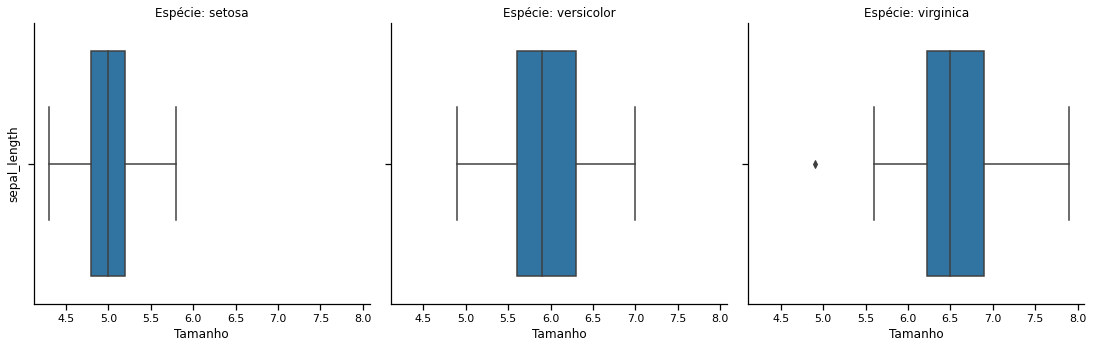

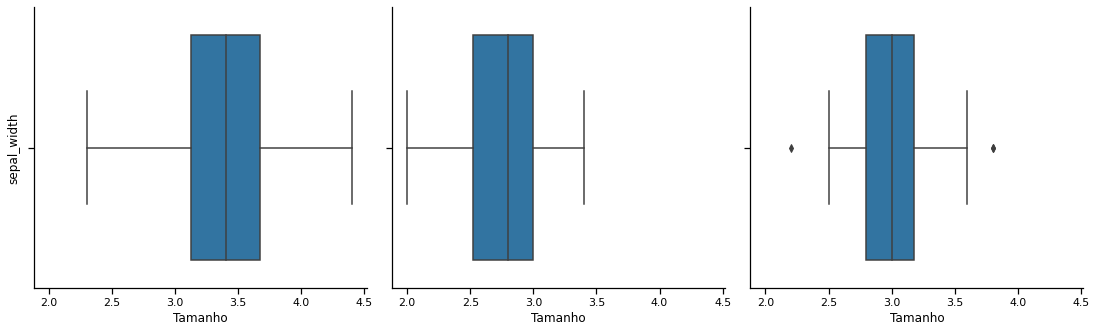

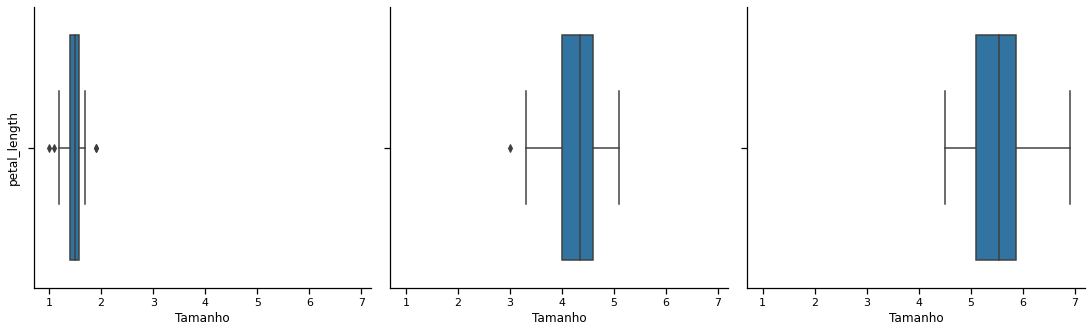

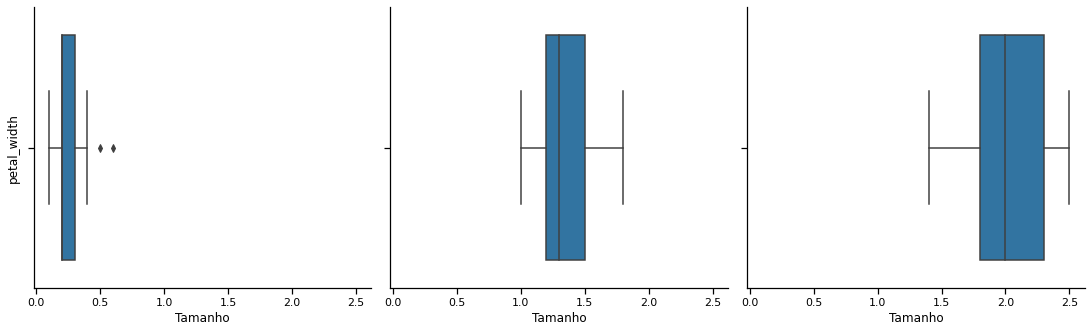

In [8]:
for i in range(len(data.columns[:-1])):

  with sns.plotting_context('notebook',font_scale=1): # altera escala da fonte

    grafico = sns.FacetGrid(data, col='species', col_wrap=4, despine=True, height=5)

    grafico.map_dataframe(sns.boxplot, data.columns[i], order=[1,2,3,4]) # para cada característica cria-se uma linha com boxplot separados por espécie
    grafico.set_ylabels(data.columns[i]) # nomeia cada linha com a caracteristica
    grafico.set_xlabels('Tamanho') # retira os labels das colunas
    if i == 0: # se for a primeira linha
      grafico.set_titles(col_template='Espécie: {col_name}') # nomeia as colunas de acordo com as espécies
    else:
      grafico.set_titles(col_template='') # senao deixa sem nome

plt.show()

###4 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

In [10]:
# Gera n dados em um intervalo [a, b] e aplica a função logaritma
def gerar_dados_log(a, b, n):
    x = np.linspace(a, b, n)
    y = np.log(x)
    return [x, y]

# Gera dados de log para intervalos aleatorios
dados_gerados_log = []

for i in range(0, 10):
    low = np.random.randint(low = i + 1, high = (i + 10) * 10)
    high = np.random.randint(low = low + 1, high = 10 * (low + 2)^3)
    
    dados_gerados_log.append([low, high, gerar_dados_log(low, high, 1000)])

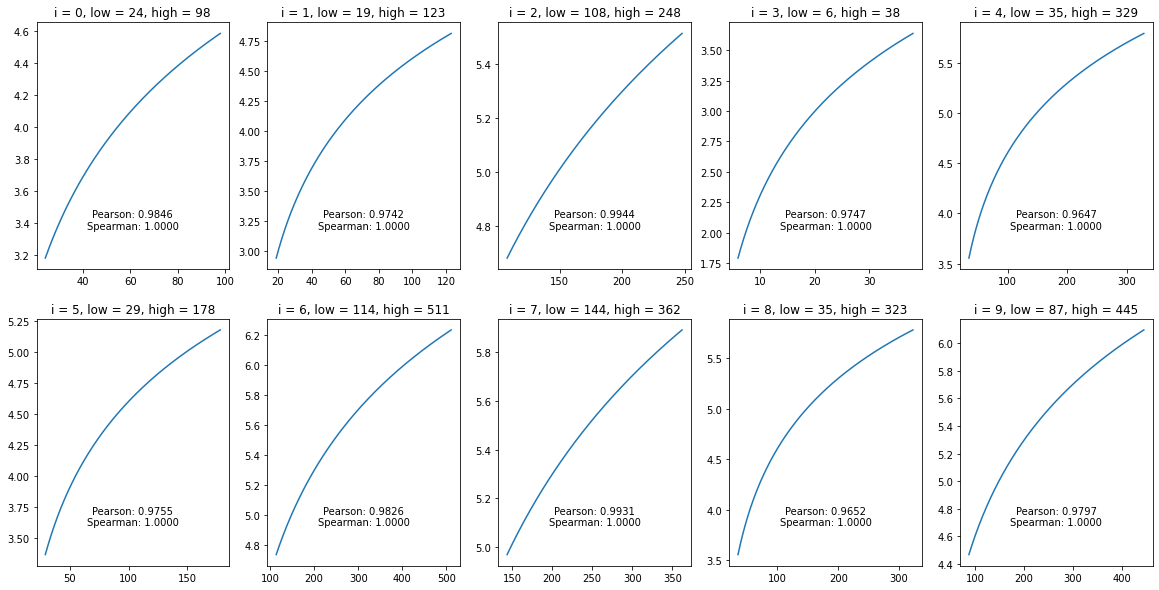

In [11]:
figure, axes = plt.subplots(2, 5, figsize = (20, 10))

for i in range(len(dados_gerados_log)):
    axes_index = (int(i / int(len(dados_gerados_log) / 2)) % int(len(dados_gerados_log) / 2),  i % int(len(dados_gerados_log) / 2))
    axes[axes_index].set_title("i = {}, low = {}, high = {}".format(i, dados_gerados_log[i][0], dados_gerados_log[i][1]))
    axes[axes_index].plot(dados_gerados_log[i][2][0], dados_gerados_log[i][2][1])
    axes[axes_index].text(0.5, 0.2, "Pearson: {:.4f}\nSpearman: {:.4f}".format(
        pearsonr(dados_gerados_log[i][2][0], dados_gerados_log[i][2][1])[0],
        spearmanr(dados_gerados_log[i][2][0], dados_gerados_log[i][2][1])[0]),
    horizontalalignment = "center", verticalalignment = "center", transform = axes[axes_index].transAxes)

### 5 - Considere o código que mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para  $Y = 0,5 \times X+\text{ruído}$. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots com os valores dos coeficientes (como feito no exemplo).


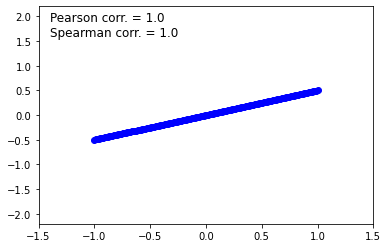

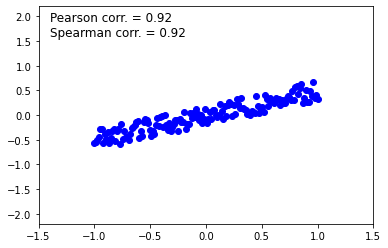

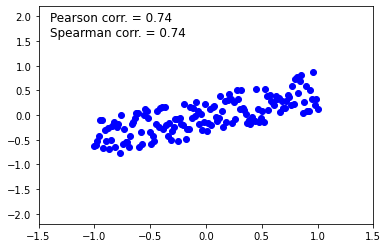

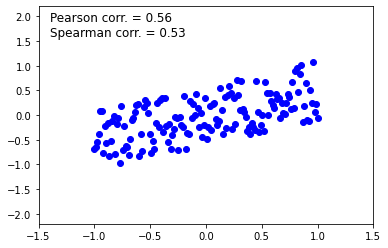

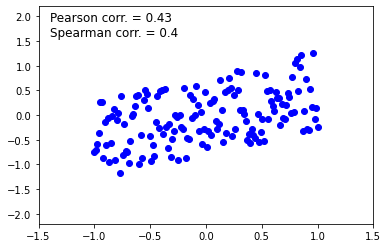

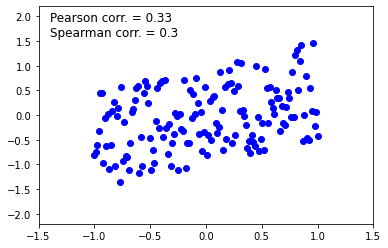

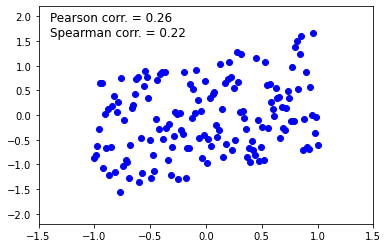

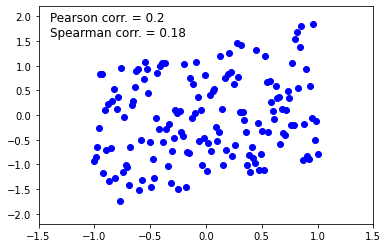

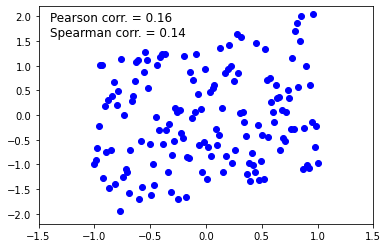

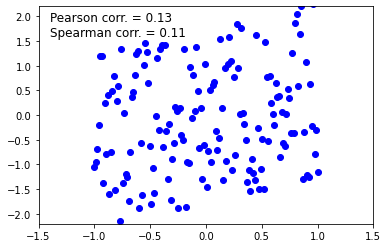

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

np.random.seed(1995)
N = 150
X = np.linspace(-1,1, N)
erro = np.random.uniform(-1,1,N) #Ruído a ser incluído na relação linear.
for sigma in np.arange(0,2, 0.2):
    Y = 0.5*X + erro*sigma #ruido = erro*sigma.
    plt.plot(X,Y, 'ro', color = 'blue')
    corr1, p_value1 = pearsonr(X, Y) #Calcula o coef. de Pearson.
    corr1 = int(corr1*100)/100
    corr2, p_value2 = spearmanr(X, Y) #Calcula o coef de Spearman.
    corr2 = int(corr2*100)/100
    plt.xlim(-1.5,1.5)
    plt.ylim(-2.2, 2.2)
    plt.text(-1.4,1.6, 'Pearson corr. = '+ str(corr1) +'\n', fontsize=12)
    plt.text(-1.4,1.6, 'Spearman corr. = '+ str(corr2), fontsize=12)
    plt.show(True)

Ao observar os scatterplots, percebe-se que o coeficiente de correlação de Pearson diminui quando se aumenta o erro com  passar das iterações. Isto é, quando todos os pontos são alinhados à reta $Y = \frac{1}{2}X$, há correlação linear perfeita ($\rho_P = 1$), e com o passar as iterações, percebe-se que muitos pontos ficam ditantes dessa reta e o valor do coeficiente diminui. Para todas as iterações, a correlação é positiva.


Com relação ao coeficiente de Spearman, observa-se o mesmo fenômeno. Ou seja, na primeira iteração, na qual todos os pontos são alinhados à reta $Y = \frac{1}{2}X$, temos $\rho_{S} = 1$. Esse valor vai decaindo com o passar das iterações. Portanto, podemos concluir que a monotonicidade diminui, pois, quanto mais alto o valor de $\rho_S$ em módulo, maior o indício de que a relação entre $Y$ e $X$ é estritamente crescente (ou decresente). Para todas as iterações, a correlação é positiva. 

###6 - Considere os dados abaixo, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis x e y. O que você pode dizer sobre esses dados?

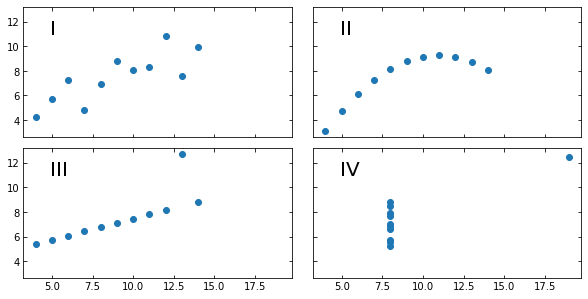

In [13]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 5),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')
plt.show()

In [14]:
# Calculo da média

for i in range(len(datasets)):
    print("Média de {}: {}".format(list(datasets.keys())[i], np.mean(datasets[list(datasets.keys())[i]][1])))

Média de I: 7.500909090909093
Média de II: 7.50090909090909
Média de III: 7.5
Média de IV: 7.500909090909091


In [15]:
# Cálculo da mediana

for i in range(len(datasets)):
    print("Mediana de {}: {}".format(list(datasets.keys())[i], np.median(datasets[list(datasets.keys())[i]][1])))

Mediana de I: 7.58
Mediana de II: 8.14
Mediana de III: 7.11
Mediana de IV: 7.04


In [16]:
# Cálculo da variância

for i in range(len(datasets)):
    print("Variância de {}: {}".format(list(datasets.keys())[i], np.var(datasets[list(datasets.keys())[i]][1])))

Variância de I: 3.7520628099173554
Variância de II: 3.752390082644628
Variância de III: 3.747836363636364
Variância de IV: 3.7484082644628103


In [17]:
# Cálculo da correlação de Pearson e Spearman

for i in range(len(datasets)):
   print("Correlação de X e Y em '{}':".format(list(datasets.keys())[i]))
   print("Pearson\t\tSpearman")
   print("{:.4f}\t\t{:.4f}\n".format(
       pearsonr(datasets[list(datasets.keys())[i]][0], datasets[list(datasets.keys())[i]][1])[0],
       spearmanr(datasets[list(datasets.keys())[i]][0], datasets[list(datasets.keys())[i]][1])[0])
    )


Correlação de X e Y em 'I':
Pearson		Spearman
0.8164		0.8182

Correlação de X e Y em 'II':
Pearson		Spearman
0.8162		0.6909

Correlação de X e Y em 'III':
Pearson		Spearman
0.8163		0.9909

Correlação de X e Y em 'IV':
Pearson		Spearman
0.8165		0.5000



Analisando os datas apenas observando as médias, medianas e variância não iria dizer muito sobre os dados, apenas que eles possuem essas estatísticas bem próximas uma das outras, porém observando os valores obtidos na coficiência de Pearson e Spearman foi possível obter:

**Pela correlação de Pearson e Spearman:**
- No dataset `I` temos que a correlção tanto de Pearson e Spearman indica uma correlação positiva forte.
- No dataset `II` temos que a correlação de Pearson indica uma correlação positiva forte e a de Spearman indica uma correlação positiva moderada.
- No dataset `III` temos que a correlação de Pearson indica uma correlação positiva forte e de Spearman indica uma correlação positiva muito forte.
- No dataset `IV` temos que a correlação de Pearson indica uma correlação positiva forte e a de Spearman indica uma correlação positiva moderada.

Foi isso que conseguimos analisar, dado que não temos mais informações sobre as variáveis não podemos implicar nenhum caso de depedência ou indepedência.